In [18]:
import numpy as np
import matplotlib.pyplot as plt

Zadanie 1

$x' = rx(t)ln(\frac{K}{x(t)})$, $\quad$ $x(75) = 10$

$x(t)$ - objętość guza nowotworowego w chwili t $\newline$
$K=100 000$ - maksymalny rozmiar guza możliwy do osiągnięcia przez nowotwór nieunaczyniowy $\newline$
$r=0.4$

In [19]:
def Gom_prim(r, K, x_t):
    return r * x_t * np.log(K/x_t)

def Gom_bis(r, K, x_t):
    _x_prim = Gom_prim(r, K, x_t)
    return r*(_x_prim*np.log(K/x_t) - (x_t/_x_prim))

def Gom_x(x_t, h, r, K):
    return x_t + h*Gom_prim(r, K, x_t) + ((h**2)/2) * Gom_bis(r, K, x_t)


In [20]:
def Ver_bis(lamb, k, N):
    return lamb**2 * N*(1-(N/k))*(1-(2*N/k))

def Ver_x(h, lamb, k, N):
    return N + h*lamb*(1-(N/k))*N + ((h**2)/2)* Ver_bis(lamb, k, N)

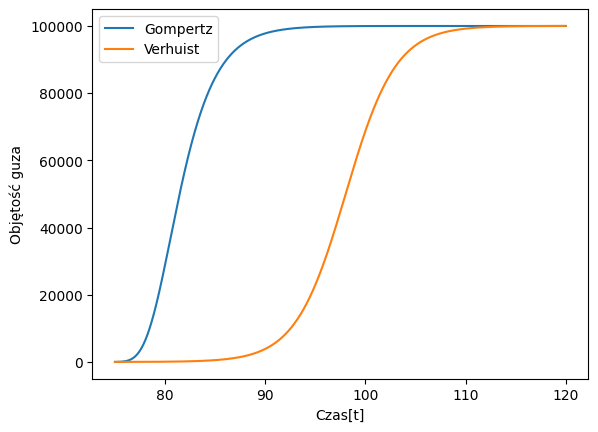

In [21]:
K = 100_000
r = 0.4
h = 0.01

Gom_list = [10]
Vers_list = [10]

t_space = np.arange(75, 120.01, h)

for t in t_space:
    Gom_list.append(Gom_x(Gom_list[-1], h, r, K))
    Vers_list.append(Ver_x(h, r, 100_000, Vers_list[-1]))


plt.plot(t_space, Gom_list[:-1], label='Gompertz')
plt.plot(t_space, Vers_list[:-1], label='Verhuist')
plt.xlabel('Czas[t]')
plt.ylabel('Objętość guza')
plt.legend()
plt.show()

Model Gompertz rośnie znacząco szybciej od modelu Verhuista.

Zadanie 2

$\frac{dN_1}{dt} = (\epsilon_1 - \gamma_1(h_1 N_1 + h_2 N_2))N_1 \newline$      
$\frac{dN_2}{dt} = (\epsilon_2 - \gamma_2(h_1 N_1 + h_2 N_2))N_2 \newline$

In [22]:
def N1_prim(epsilon, gamma, h1, N1, h2, N2):
    return (epsilon - gamma*(h1*N1 + h2*N2))*N1

def N2_prim(epsilon, gamma, h1, N1, h2, N2):
    return (epsilon - gamma*(h1*N1 + h2*N2))*N2

def N1_th(epsilon, gamma, h1, N1, h2, N2, k):
    return N1 + k*N1_prim(epsilon, gamma, h1, N1, h2, N2)

def N2_th(epsilon, gamma, h1, N1, h2, N2, k):
    return N2 + k*N2_prim(epsilon, gamma, h1, N1, h2, N2)

a)

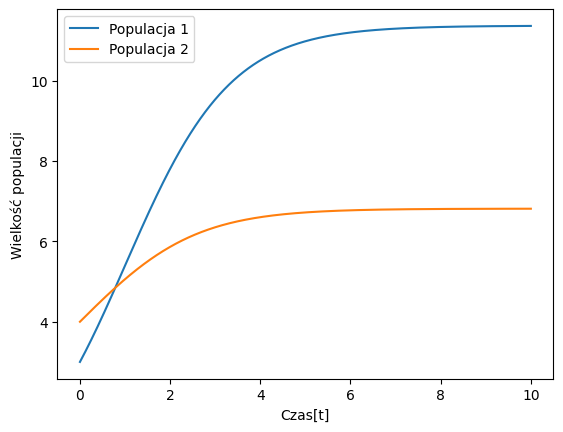

In [23]:
e1, g1, h1 = 1.25, 0.5, 0.1
e2, g2, h2 = 0.5, 0.2, 0.2

k = 0.001

N1_list = [3]
N2_list = [4]

t_space = np.arange(k, 10+k, k)

for t in t_space:
    N1_list.append(N1_th(e1, g1, h1, N1_list[-1], h2, N2_list[-1], k))
    N2_list.append(N2_th(e2, g2, h1, N1_list[-1], h2, N2_list[-1], k))

plt.plot(t_space, N1_list[:-1], label='Populacja 1')
plt.plot(t_space, N2_list[:-1], label='Populacja 2')
plt.xlabel('Czas[t]')
plt.ylabel('Wielkość populacji')
plt.legend()
plt.show()

b)

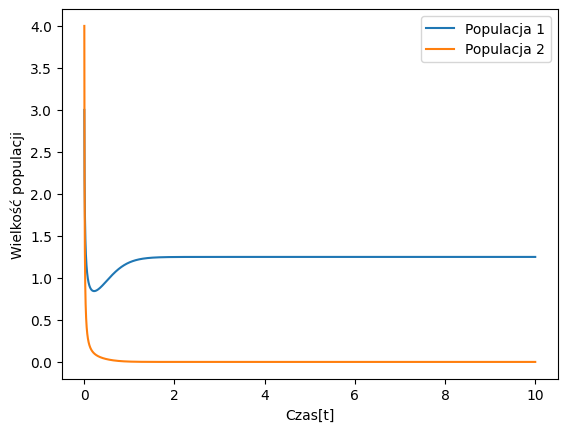

In [24]:
e1, g1, h1 = 5, 4, 1
e2, g2, h2 = 5, 8, 4

k = 0.001

N1_list = [3]
N2_list = [4]

t_space = np.arange(k, 10+k, k)

for t in t_space:
    N1_list.append(N1_th(e1, g1, h1, N1_list[-1], h2, N2_list[-1], k))
    N2_list.append(N2_th(e2, g2, h1, N1_list[-2], h2, N2_list[-1], k))

plt.plot(t_space, N1_list[:-1], label='Populacja 1')
plt.plot(t_space, N2_list[:-1], label='Populacja 2')
plt.xlabel('Czas[t]')
plt.ylabel('Wielkość populacji')
plt.legend()
plt.show()

Oba wykresy różnią się dość znacząco.$\newline$
Na pierwszym widzimy sytuację w której obie populacje statycznie rosną do pewnego momentu.$\newline$
Na drugim obie populacje maleją. Populacja 2 spada praktycznie do 0, w tym samym momencie populacja 1 odbija się od punktu krytycznego, rośnie i zbiega asymptotycznie do pewnego punktu.

[]

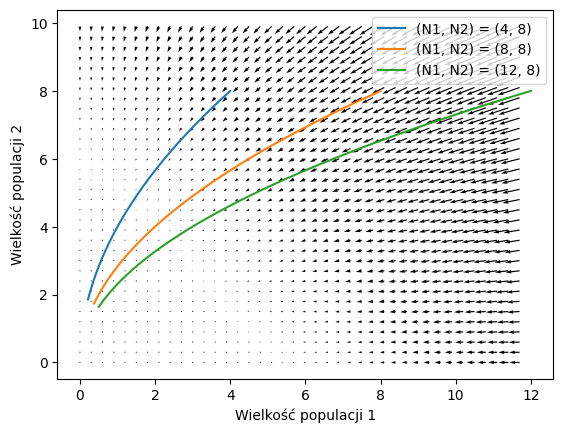

In [25]:
e1, g1, h1 = 0.8, 1, 0.3
e2, g2, h2 = 0.4, 0.5, 0.4

N1_1, N2_1 = [4], [8]
N1_2, N2_2 = [8], [8]
N1_3, N2_3 = [12], [8]

for _ in t_space:
    N1_1.append(N1_th(e1, g1, h1, N1_1[-1], h2, N2_1[-1], k))
    N2_1.append(N2_th(e2, g2, h1, N1_1[-2], h2, N2_1[-1], k))

    N1_2.append(N1_th(e1, g1, h1, N1_2[-1], h2, N2_2[-1], k))
    N2_2.append(N2_th(e2, g2, h1, N1_2[-2], h2, N2_2[-1], k))

    N1_3.append(N1_th(e1, g1, h1, N1_3[-1], h2, N2_3[-1], k))
    N2_3.append(N2_th(e2, g2, h1, N1_3[-2], h2, N2_3[-1], k))

grid = np.meshgrid(np.arange(0, 12, 0.3), np.arange(0, 10, 0.3))
plt.quiver(grid[0], grid[1], N1_prim(e1, g1, h1, grid[0], h2, grid[1]), N2_prim(e2, g2, h1, grid[0], h2, grid[1]))

plt.plot(N1_1, N2_1, label='(N1, N2) = (4, 8)')
plt.plot(N1_2, N2_2, label='(N1, N2) = (8, 8)')
plt.plot(N1_3, N2_3, label='(N1, N2) = (12, 8)')
plt.xlabel('Wielkość populacji 1')
plt.ylabel('Wielkość populacji 2')
plt.legend()
plt.plot()

Im większa liczebność populacji 1 na początku tym szybszy spadek jej liczebności o czym świadczy wydłużenie wektorów wskazujących na prędkość oraz kierunek tej zmiany. Dodatkowo powoduje to obniżenie końcowej liczebności populacji 2.